## Analyse Bearbeitete Umgebungsfläche BUF / Geschossfläche GF

In [1]:
from typing import Final

import seaborn as sns
import src.package.importer as im
import src.package.consts as c
import src.package.charts as charts
import src.package.importer_usages as imp_usg

FIELD: Final = c.FIELD_COST_REF_BUF
FIELD_RATIO: Final = c.FIELD_BUF_GF_RATIO
LABEL: Final = charts.LABEL_BUF
LABEL_RATIO: Final = charts.LABEL_RATIO_BUF_GF

charts.set_preferences(sns, font_scale=2)

df = im.get_extended_dataset('../../package/datasets/full_dataset.csv', cluster_threshold=10, hnf_gf_ratio=False)
df = im.calculate_gf_ratio(df, other_field=FIELD, ratio_field=FIELD_RATIO)
df, usages = imp_usg.extract_usage_details(df)
filtered_df = im.select_relevant_features(df, additional_features=[FIELD])

df = im.cap_upper_gf_field(df, upper_percentile='90%', field=FIELD)

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


### Allgemein

In [2]:
filtered_df[FIELD].describe()

count       68.000000
mean      6479.794118
std       7118.656956
min        316.000000
25%       2448.750000
50%       4464.000000
75%       8004.750000
max      45250.000000
Name: cost_ref_buf, dtype: float64

In [3]:
filtered_df[c.FIELD_AREA_TOTAL_FLOOR_416].describe()

count      894.000000
mean      6384.539150
std       8584.172628
min         50.000000
25%       1423.250000
50%       3420.500000
75%       7695.000000
max      75328.000000
Name: area_total_floor_416, dtype: float64

### Visualisierungen
Zeigt **Bearbeitete Umgebungsfläche** in relation zur **Geschossfläche**.

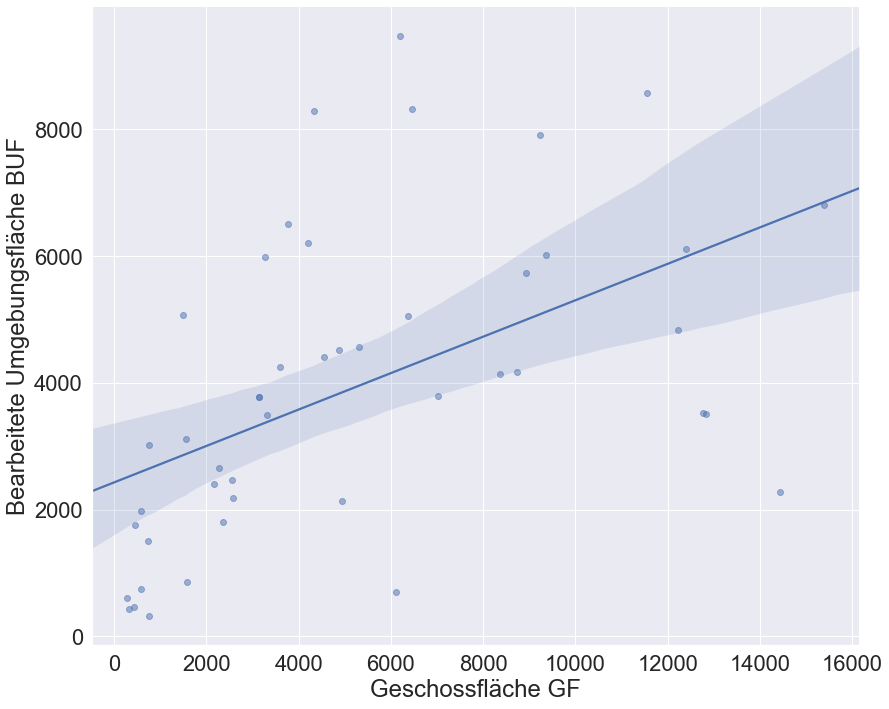

In [4]:
charts.lmplot_gf_field(df, field=FIELD, field_label=LABEL)

<AxesSubplot:xlabel='Geschossfläche GF', ylabel='Bearbeitete Umgebungsfläche BUF'>

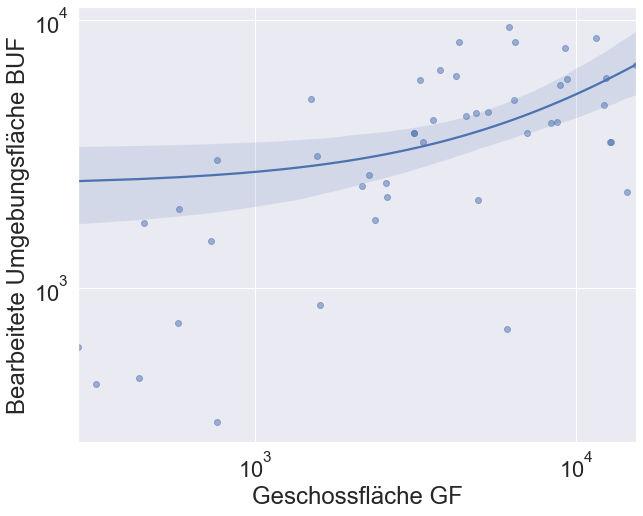

In [5]:
charts.regplot_gf_field(df, field=FIELD, field_label=LABEL, logscale=True)

#### 75% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


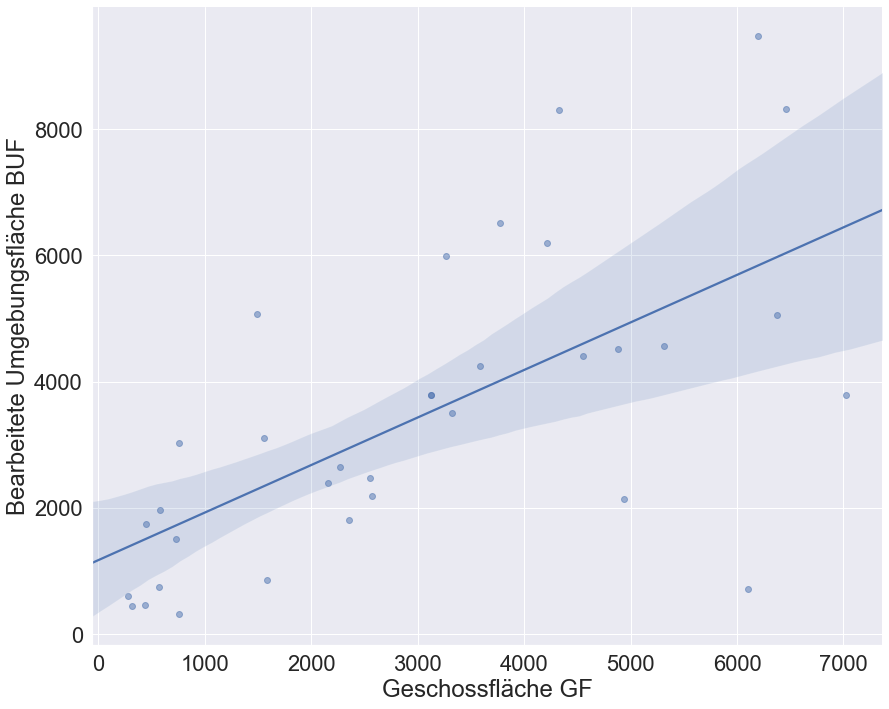

In [6]:
df_75_percentile = im.cap_upper_gf_field(df)
charts.lmplot_gf_field(df_75_percentile, field=FIELD, field_label=LABEL, ratio_label=FIELD_RATIO, percentile='75')

#### 25% Perzentil

/Users/lucadietiker/Documents/05_Projects/Python.nosync/ip5-metriken-bauwesen/src/package/importer.py:96: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  capped_df = capped_df[df[c.FIELD_AREA_TOTAL_FLOOR_416] <= gf_upper]


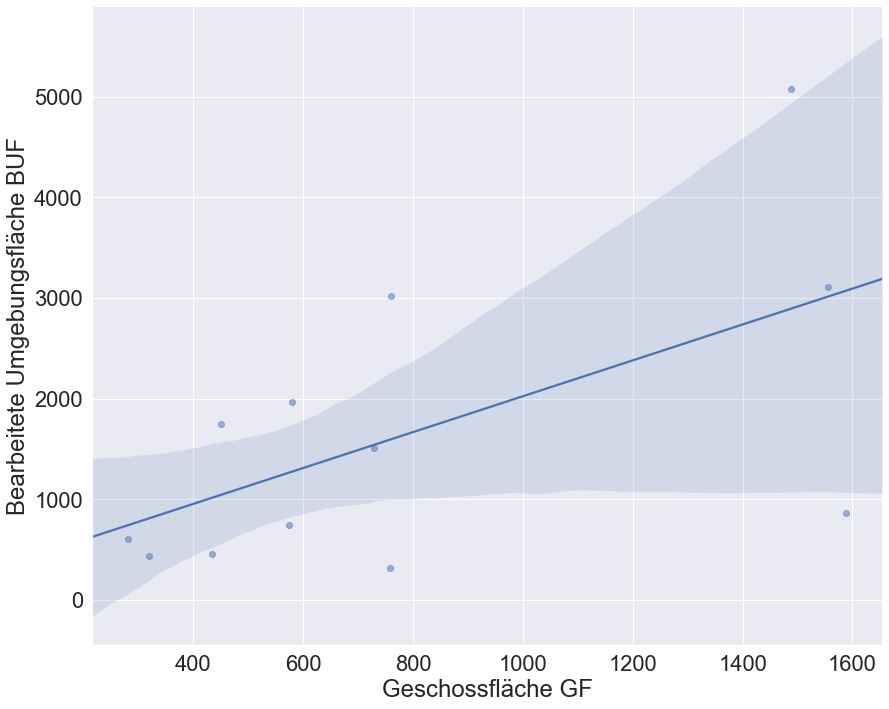

In [7]:
df_25_percentile = im.cap_upper_gf_field(df, upper_percentile='25%')
charts.lmplot_gf_field(df_25_percentile, field=FIELD, field_label=LABEL, ratio_label=FIELD_RATIO, percentile='25')

### Nach Kategorie
Ausgenommen: "TECHNIK", "GESUNDHEIT", "OFFENE_BAUTEN", "BUERO", "BETRIEB", "BEHERBERGUNG", "ANDERES", "HALLEN"

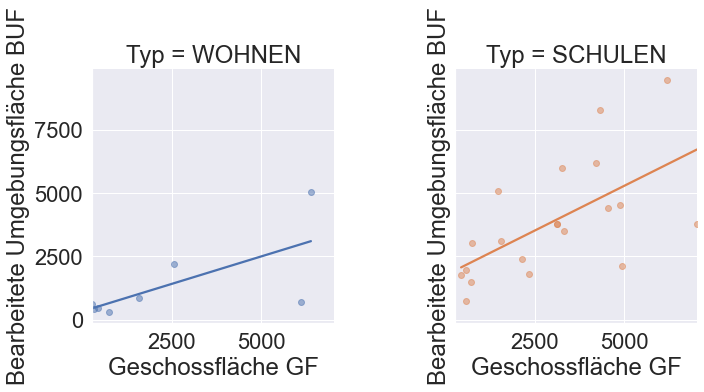

In [8]:
clusters_to_remove = ["TECHNIK", "GESUNDHEIT", "OFFENE_BAUTEN", "BUERO", "BETRIEB", "BEHERBERGUNG", "ANDERES", "HALLEN"]
df_75_percentile.drop(df_75_percentile[df_75_percentile[c.FIELD_USAGE_CLUSTER].isin(clusters_to_remove)].index, inplace=True)

charts.lmplot_clustered(df_75_percentile, y=FIELD, y_label=LABEL, ratio_label=FIELD_RATIO, save_label=f'{FIELD_RATIO}_75percentile')

### Beschreibung

In [9]:
charts.describe_ratios(df, ratio_field=FIELD_RATIO)

,count,mean,std,min,25%,40%,50%,75%,max
usage_cluster,,,,,,,,,
ANDERES,1.0,1.287107,NaN,1.287107,1.287107,1.287107,1.287107,1.287107,1.287107
BEHERBERGUNG,1.0,1.182553,NaN,1.182553,1.182553,1.182553,1.182553,1.182553,1.182553
BETRIEB,1.0,1.724622,NaN,1.724622,1.724622,1.724622,1.724622,1.724622,1.724622
BUERO,1.0,0.858757,NaN,0.858757,0.858757,0.858757,0.858757,0.858757,0.858757
GESUNDHEIT,1.0,0.856199,NaN,0.856199,0.856199,0.856199,0.856199,0.856199,0.856199
HALLEN,2.0,1.067254,0.142252,0.966667,1.016960,1.047137,1.067254,1.117548,1.167841
SCHULEN,20.0,1.749383,1.086795,0.432935,1.032310,1.207987,1.382159,2.016600,3.972405
WOHNEN,19.0,0.648942,0.474159,0.115738,0.406246,0.481394,0.494090,0.767547,2.141844


### Violinplot
Zeigt Ratios verschiedener Cluster inkl. Verteilung.<br>
Unterteilung in umgekehrte Perzentile (also Grösser als).<br>

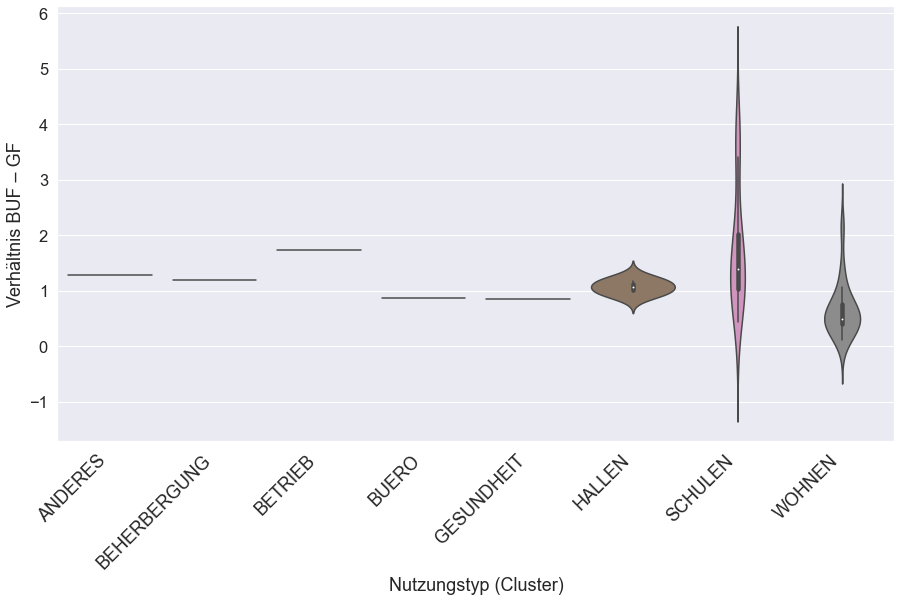

In [10]:
charts.set_preferences(sns, rc=[15, 8], font_scale=1.5)
charts.violinplot_ratios(df, ratio_field=FIELD_RATIO, ratio_label=LABEL_RATIO, cut=3,
                         garage_hue=False)

## Benchmarks
Benchmarks zu den Ratio – nach Cluster.<br>

Ratios sind in **30%** der Fälle grösser als x

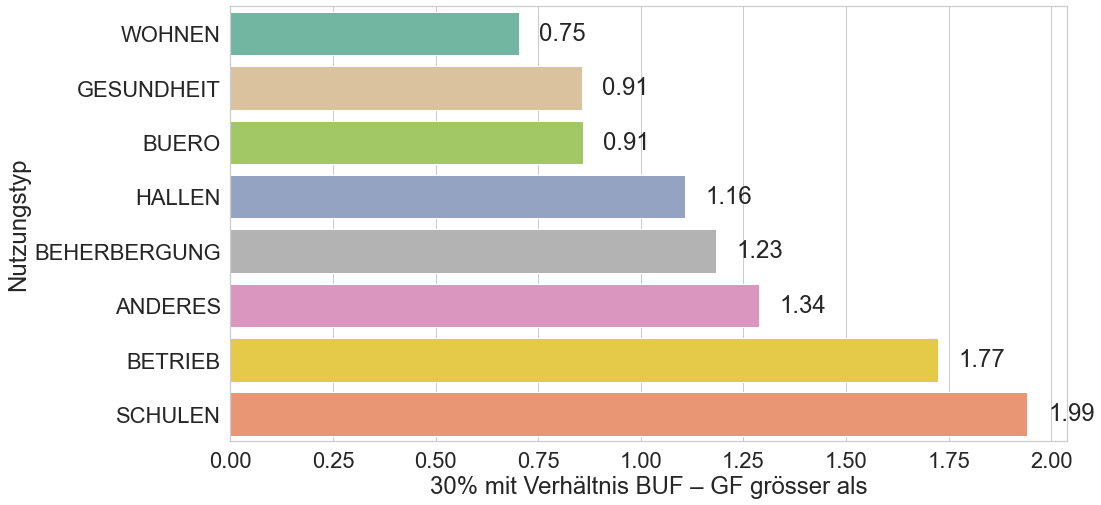

In [11]:
charts.set_preferences(sns, font_scale=2)

ratio_data = df[FIELD_RATIO]
charts.barplot_reversed_percentiles(ratio_data, df, ratio_field=FIELD_RATIO, ratio_label=LABEL_RATIO, percentile=70)

Ratios sind in **60%** der Fälle grösser als x

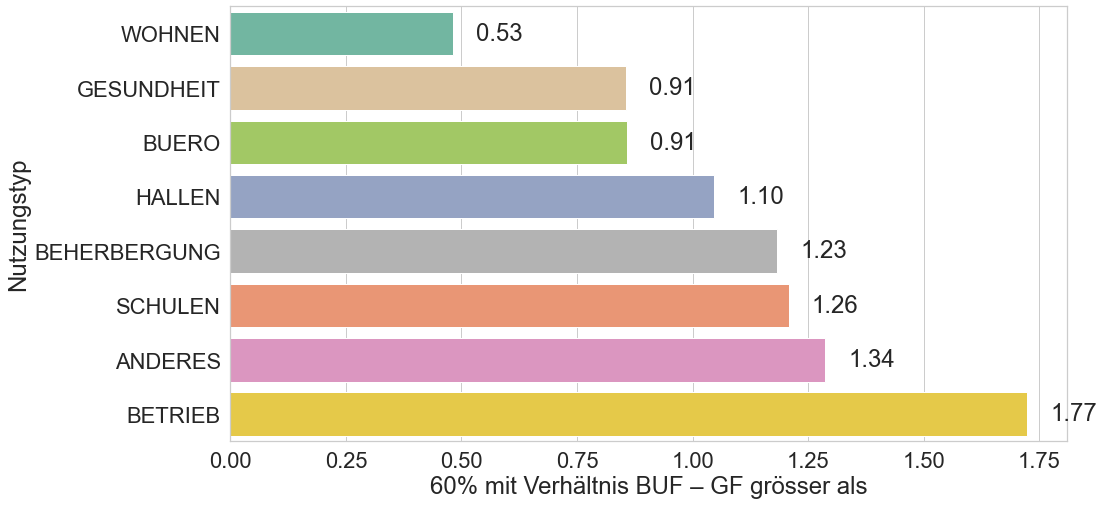

In [12]:
charts.barplot_reversed_percentiles(ratio_data, df, ratio_field=FIELD_RATIO, ratio_label=LABEL_RATIO, percentile=40)

Ratios sind in **70%** der Fälle grösser als x

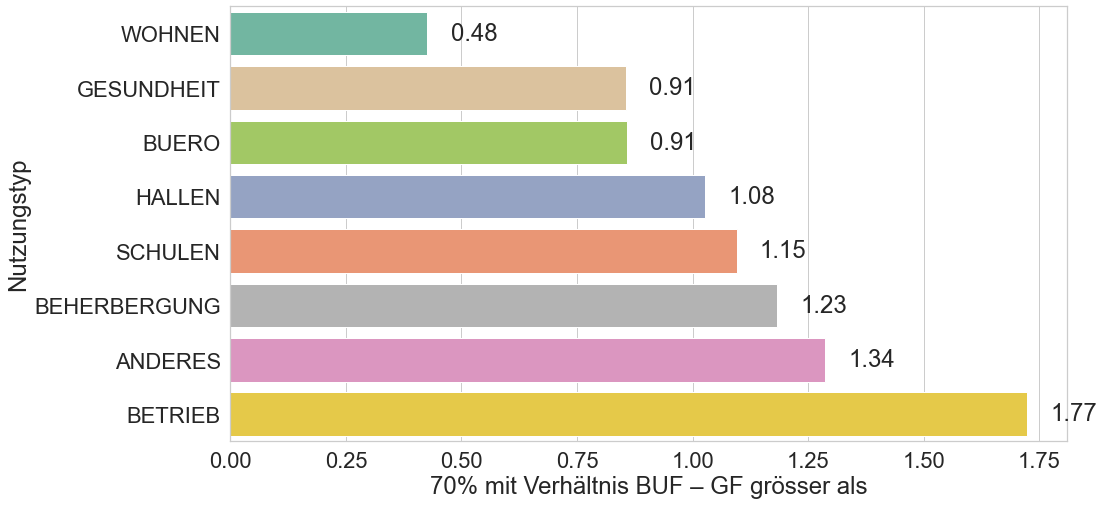

In [13]:
charts.barplot_reversed_percentiles(ratio_data, df, ratio_field=FIELD_RATIO, ratio_label=LABEL_RATIO, percentile=30)